In [1]:
# https://mldlcvmjw.tistory.com/194

# https://github.com/rickiepark/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb

In [2]:
import os
import tarfile
import urllib
import pandas as pd
import numpy as np

import urllib.request


import warnings
warnings.filterwarnings(action='ignore',message='^internal gelsd')


In [3]:
# 맷플롯립 설정
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [4]:

# 그림을 저장할 폴드
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

In [5]:
def save_fig(fig_id, tight_layout=True, fig_extension="png",resolution=300):
    path = os.path.join(IMAGES_PATH,fig_id +"."+fig_extension)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [6]:
IMAGES_PATH

'./images/end_to_end_project'

In [7]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"   # 압축파일 다운

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [8]:
fetch_housing_data()

In [9]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [10]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# 데이터 프로파일링


In [11]:
# import pandas_profiling
# housing_pr = housing.profile_report()
# housing_pr.to_file('/Users/iseunghyeon/Desktop/고급기계 실습/housing_report.html') # pr_report.html 파일로 저장

In [12]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [13]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [14]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [15]:
housing.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


# histplot

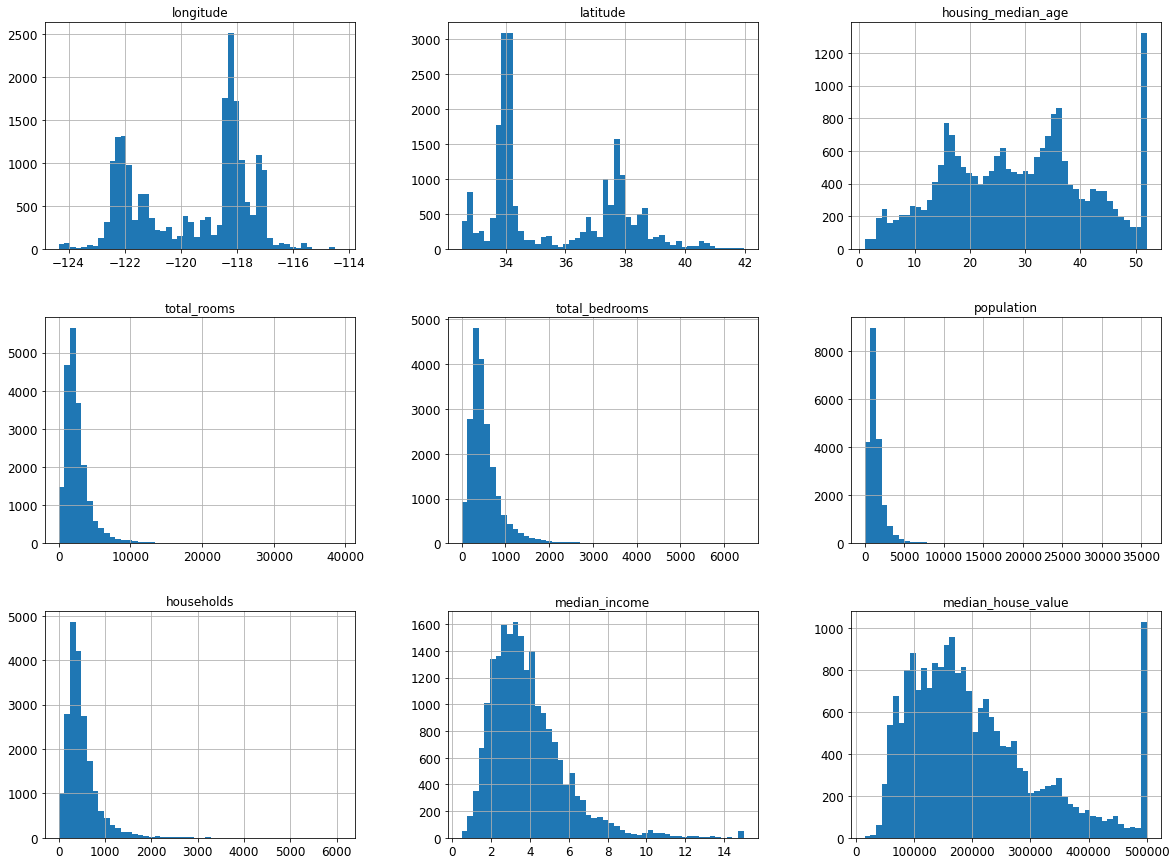

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))
plt.show()

# Split train, test set 

In [17]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=98)

In [18]:
# #  수동적인 방법
# np.random.seed(42)
# import numpy as np

# def split_train_test(data,test_ratio):
#     shuffled_indices = np.random.permutation(len(data))
#     test_set_size = int(len(data)*test_ratio)
#     test_indices = shuffled_indices[:test_set_size]

In [19]:
train_set.shape
test_set.shape


(4128, 10)

# 계측정 샘플링
-> 샘플에서도 전체 인구의 비율을 대표할 수 있도록 선택해야함


In [20]:
housing['income_cat']= pd.cut(housing['median_income'],bins=[0.,1.5,3.0,4.5,6.,np.inf],labels=[1,2,3,4,5])

In [21]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2


<AxesSubplot:>

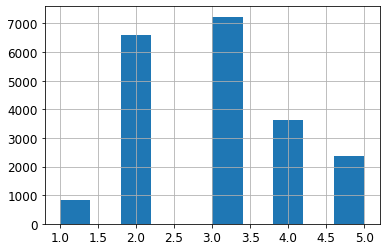

In [22]:
housing['income_cat'].hist()

-> 위의 그래프 결과 중간소득이 중간 주택 가격을 예측하는 데 매우 중요하다라는 가정을 세울 수 있음

# 계층적  데이터 만들기

In [23]:
from sklearn.model_selection import StratifiedShuffleSplit


split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=98)
for train_index,test_index in split.split(housing,housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [24]:
strat_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
9100,-117.92,34.59,7.0,681.0,125.0,485.0,104.0,2.7396,125600.0,INLAND,2
19610,-121.14,37.48,6.0,1772.0,332.0,1011.0,331.0,3.7045,128100.0,INLAND,3
17911,-121.98,37.36,33.0,1582.0,272.0,809.0,267.0,5.7059,287200.0,<1H OCEAN,4
20303,-119.18,34.16,12.0,460.0,101.0,405.0,103.0,5.2783,167400.0,NEAR OCEAN,4
6341,-117.90,33.97,23.0,7353.0,1255.0,4014.0,1124.0,5.4155,213200.0,<1H OCEAN,4
...,...,...,...,...,...,...,...,...,...,...,...
12954,-121.28,38.68,14.0,11442.0,2690.0,6068.0,2435.0,2.6016,121200.0,INLAND,2
10945,-117.88,33.74,19.0,2261.0,642.0,3545.0,635.0,2.5224,148500.0,<1H OCEAN,2
15468,-117.19,33.18,7.0,3561.0,722.0,1921.0,657.0,4.1128,209700.0,<1H OCEAN,3
4878,-118.24,34.03,52.0,142.0,47.0,137.0,45.0,1.8333,312500.0,<1H OCEAN,2


# 지리적 데이터 시각화

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

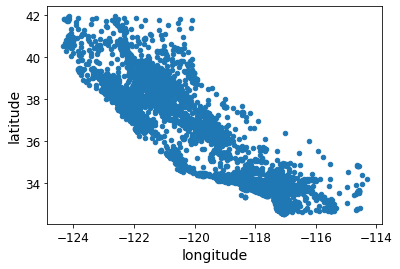

In [25]:
housing.plot(kind='scatter',x='longitude',y='latitude')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

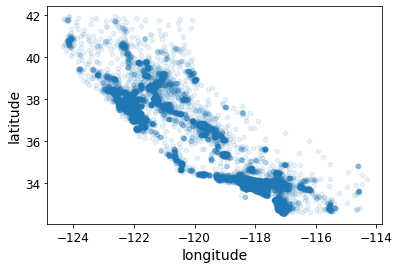

In [26]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1)

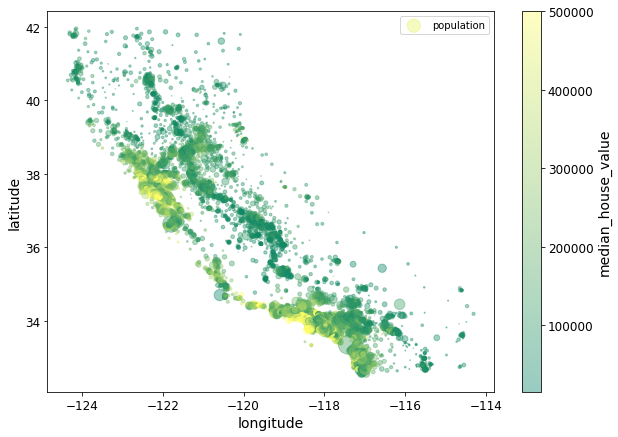

In [34]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,s=housing['population']/100,label='population',
             figsize=(10,7),c='median_house_value',cmap=plt.get_cmap('summer'),colorbar=True,sharex=False)
plt.legend()

# 상관관계 조사

In [28]:
corr_matrix = housing.corr()

In [29]:
# 중간가격칼럼과 다른 칼럼간의 상관계수를 볼수 있음
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

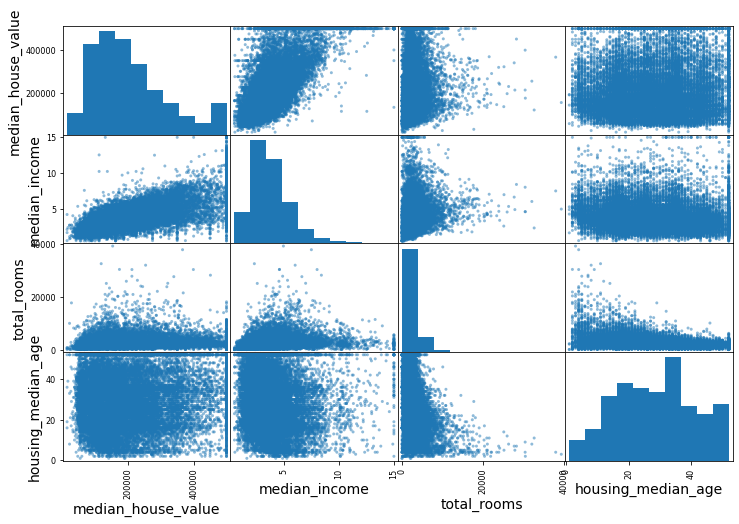

In [30]:
from pandas.plotting import scatter_matrix

attributes=['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(housing[attributes],figsize=(12,8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

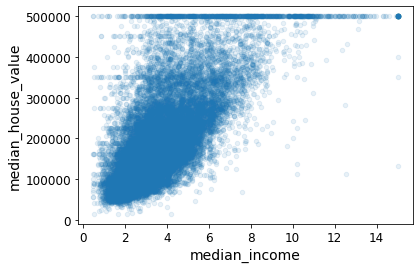

In [31]:
housing.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.1)
# 양의 상관관계가 보임

# 다중공산성 문제
-> 상관계수가 높은 변수들 때문에 나머지 변수들에게서 정보를 잘얻지 못함.

! 머신러닝에서만 잘활용하고, 딥러닝에선 잘 사용하지 않음

In [32]:
housing['rooms_per_household']=housing['total_rooms']/housing['households']
housing['bedrooms_per_rooms']=housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household']=housing['population']/housing['households']

In [33]:
corr_matrix=housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False )

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_rooms         -0.255880
Name: median_house_value, dtype: float64

# 머신러닝을 위한 데이터준비

In [42]:
pd.options.display.float_format = '{:.1f}'.format


In [67]:
housing = strat_train_set.drop("median_house_value", axis=1) # 훈련 세트를 위해 레이블 삭제
housing_labels = strat_train_set["median_house_value"].copy()


In [68]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
11441,-118.0,33.7,18.0,3833.0,NaN,2192.0,996.0,3.5,<1H OCEAN,3
4767,-118.4,34.0,37.0,1236.0,NaN,966.0,292.0,3.1,<1H OCEAN,3
19122,-122.7,38.2,23.0,4030.0,NaN,1852.0,778.0,3.4,<1H OCEAN,3
9571,-120.6,37.4,16.0,638.0,NaN,380.0,132.0,1.9,INLAND,2
2578,-124.1,40.9,34.0,4183.0,NaN,1891.0,669.0,3.2,NEAR OCEAN,3


In [69]:
# 칼럼에 널값이 있는 행 삭제
# 방법 1
# total_bedrooms 칼럼에 널값이 있는 행 삭제
sample_incomplete_rows.dropna(subset =['total_bedrooms'])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat


In [70]:
# 방법 2
# 칼럼을 기준으로 삭제
sample_incomplete_rows.drop('total_bedrooms',axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity,income_cat
11441,-118.0,33.7,18.0,3833.0,2192.0,996.0,3.5,<1H OCEAN,3
4767,-118.4,34.0,37.0,1236.0,966.0,292.0,3.1,<1H OCEAN,3
19122,-122.7,38.2,23.0,4030.0,1852.0,778.0,3.4,<1H OCEAN,3
9571,-120.6,37.4,16.0,638.0,380.0,132.0,1.9,INLAND,2
2578,-124.1,40.9,34.0,4183.0,1891.0,669.0,3.2,NEAR OCEAN,3


In [71]:
# 옵션3
# 널값대신 median값 채우기
median = housing['total_bedrooms'].median()
sample_incomplete_rows['total_bedrooms'].fillna(median,inplace=True)

In [72]:
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
11441,-118.0,33.7,18.0,3833.0,433.0,2192.0,996.0,3.5,<1H OCEAN,3
4767,-118.4,34.0,37.0,1236.0,433.0,966.0,292.0,3.1,<1H OCEAN,3
19122,-122.7,38.2,23.0,4030.0,433.0,1852.0,778.0,3.4,<1H OCEAN,3
9571,-120.6,37.4,16.0,638.0,433.0,380.0,132.0,1.9,INLAND,2
2578,-124.1,40.9,34.0,4183.0,433.0,1891.0,669.0,3.2,NEAR OCEAN,3


In [73]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy ='median')



In [74]:
housing_num = housing.drop('ocean_proximity',axis=1)

In [76]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [77]:
imputer.statistics_

array([-118.5   ,   34.25  ,   29.    , 2115.    ,  433.    , 1161.    ,
        408.    ,    3.5313,    3.    ])

In [78]:
housing_num.median().values
# 각특성의 중간값이 수동으로 계산한것과 같은지 확인

/var/folders/_q/43ytj6j945nfj87lz09bt4nr0000gn/T/ipykernel_7938/3605723347.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  housing_num.median().values


array([-118.5   ,   34.25  ,   29.    , 2115.    ,  433.    , 1161.    ,
        408.    ,    3.5313])

In [79]:
X = imputer.transform(housing_num)

In [80]:
housing_tr = pd.DataFrame(X,columns=housing_num.columns,index=housing_num.index)

In [84]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
11441,-118.0,33.7,18.0,3833.0,433.0,2192.0,996.0,3.5,3.0
4767,-118.4,34.0,37.0,1236.0,433.0,966.0,292.0,3.1,3.0
19122,-122.7,38.2,23.0,4030.0,433.0,1852.0,778.0,3.4,3.0
9571,-120.6,37.4,16.0,638.0,433.0,380.0,132.0,1.9,2.0
2578,-124.1,40.9,34.0,4183.0,433.0,1891.0,669.0,3.2,3.0


In [85]:
imputer.strategy

'median'

# 카테고리변수다루기

In [87]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
15732,NEAR BAY
8022,<1H OCEAN
6338,<1H OCEAN
2528,INLAND
2759,INLAND
1045,INLAND
1069,INLAND
3600,<1H OCEAN
12291,INLAND
20500,<1H OCEAN


In [88]:
# 거의 안씀
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:5]

array([[3.],
       [0.],
       [0.],
       [1.],
       [1.]])

In [89]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()

housing_cat_1hot=cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [90]:
# toarray()를 통해 밀집벡터로 만들어줌
housing_cat_1hot.toarray()


array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.]])

In [92]:
# toarray 안쓰고 sparse = Flase 옵션으로 대신함

cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.]])

# 나만의 변환기 만들기

In [93]:
from sklearn.base import BaseEstimator, TransformerMixin

# 열 인덱스
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # *args 또는 **kargs 없음
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # 아무것도 하지 않습니다
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.to_numpy())

In [94]:

col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names] # 열 인덱스 구하기

In [95]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_household,population_per_household
15732,-122.4,37.8,52.0,2747.0,736.0,1309.0,653.0,2.9,NEAR BAY,2,4.2,2.0
8022,-118.1,33.8,37.0,2143.0,382.0,1047.0,377.0,4.4,<1H OCEAN,3,5.7,2.8
6338,-117.9,34.0,16.0,19059.0,3079.0,10988.0,3061.0,5.5,<1H OCEAN,4,6.2,3.6
2528,-122.2,39.5,8.0,1268.0,336.0,1237.0,326.0,1.4,INLAND,1,3.9,3.8
2759,-115.5,32.7,11.0,2872.0,610.0,2644.0,581.0,2.6,INLAND,2,4.9,4.6


In [96]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [98]:
housing_num_tr

array([[-1.42979595,  1.00287516,  1.85255697, ..., -0.47723638,
        -0.09458317,  0.82431276],
       [ 0.72349901, -0.83962186,  0.65905325, ...,  0.09358332,
        -0.0271927 , -0.53957477],
       [ 0.84312651, -0.78350519, -1.01185195, ...,  0.30298255,
         0.04367758, -0.79363004],
       ...,
       [-1.23041679,  1.22266542,  1.85255697, ...,  0.01872214,
        -0.07112013,  0.17269953],
       [-1.22543231,  1.08237376, -1.17098578, ..., -0.32887546,
        -0.07439559,  0.41859802],
       [ 0.24498902, -0.14751638, -1.64838726, ...,  0.03322013,
        -0.03284561, -0.44571602]])

In [99]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [100]:
housing_prepared

array([[-1.42979595,  1.00287516,  1.85255697, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.72349901, -0.83962186,  0.65905325, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.84312651, -0.78350519, -1.01185195, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.23041679,  1.22266542,  1.85255697, ...,  0.        ,
         0.        ,  0.        ],
       [-1.22543231,  1.08237376, -1.17098578, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.24498902, -0.14751638, -1.64838726, ...,  0.        ,
         0.        ,  0.        ]])

In [101]:
housing_prepared.shape

(16512, 17)

In [102]:
from sklearn.base import BaseEstimator, TransformerMixin

# 수치형 열과 범주형 열을 선택하기 위한 클래스
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values


In [103]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

old_num_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

old_cat_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

In [104]:
from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", old_num_pipeline),
        ("cat_pipeline", old_cat_pipeline),
    ])

In [105]:
old_housing_prepared = old_full_pipeline.fit_transform(housing)
old_housing_prepared

array([[-1.42979595,  1.00287516,  1.85255697, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.72349901, -0.83962186,  0.65905325, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.84312651, -0.78350519, -1.01185195, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.23041679,  1.22266542,  1.85255697, ...,  0.        ,
         0.        ,  0.        ],
       [-1.22543231,  1.08237376, -1.17098578, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.24498902, -0.14751638, -1.64838726, ...,  0.        ,
         0.        ,  0.        ]])

In [106]:
np.allclose(housing_prepared, old_housing_prepared)

True

In [108]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression()

In [109]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("예측값: ",lin_reg.predict(some_data_prepared))

예측값:  [252669.55149011 247268.89624624 192068.13536258   9072.56531554
  30645.97175532]


In [110]:
print("레이블: ",list(some_labels))

레이블:  [341700.0, 216000.0, 265200.0, 125000.0, 72700.0]


In [111]:
some_data_prepared

array([[-1.42979595e+00,  1.00287516e+00,  1.85255697e+00,
         5.38143117e-02,  4.80130248e-01, -1.00266279e-01,
         4.07585777e-01, -4.87766274e-01, -9.54687050e-01,
        -4.77236379e-01, -9.45831727e-02,  8.24312755e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00],
       [ 7.23499009e-01, -8.39621855e-01,  6.59053252e-01,
        -2.22753139e-01, -3.66571310e-01, -3.36091148e-01,
        -3.17669792e-01,  3.02255004e-01, -6.43196280e-03,
         9.35833226e-02, -2.71927036e-02, -5.39574773e-01,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 8.43126507e-01, -7.83505195e-01, -1.01185195e+00,
         7.52296705e+00,  6.08414650e+00,  8.61175245e+00,
         6.73517783e+00,  8.84298293e-01,  9.41823124e-01,
         3.02982545e-01,  4.36775770e-02, -7.93630037e-01,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.0

In [113]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels,housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

67330.49844659421

In [114]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels,housing_predictions)
lin_mae

49044.55398161198

In [115]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=98)
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor(random_state=98)

In [116]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [117]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [118]:
def display_scores(scores):
    print("점수:", scores)
    print("평균:", scores.mean())
    print("표준 편차:", scores.std())

display_scores(tree_rmse_scores)

점수: [68447.34702184 71455.31946236 68230.54084747 69768.95898316
 65721.63176463 70811.75512666 72655.81687673 65927.87850878
 68162.23167061 70036.03039436]
평균: 69121.75106566053
표준 편차: 2144.2352537050283


In [119]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

점수: [69237.48031155 67157.73409171 65986.7433924  69371.31350464
 63706.53457187 68333.87642714 68549.96758428 65282.07848136
 68157.17734609 71063.42478141]
평균: 67684.63304924469
표준 편차: 2069.3976376568557


In [121]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=98)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=98)

In [122]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18530.376625151384

In [123]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

점수: [50264.74050382 50766.83930203 47309.81764564 51398.06843339
 46406.76444456 48780.32305932 51121.33000782 46692.59183237
 48568.35425155 51075.488994  ]
평균: 49238.4318474498
표준 편차: 1839.8781339899224


In [124]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count      10.0
mean    67684.6
std      2181.3
min     63706.5
25%     66279.5
50%     68245.5
75%     69065.6
max     71063.4
dtype: float64

In [125]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

106246.54651473487

In [128]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # 12(=3×4)개의 하이퍼파라미터 조합을 시도합니다.
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # bootstrap은 False로 하고 6(=2×3)개의 조합을 시도합니다.
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# 다섯 개의 폴드로 훈련하면 총 (12+6)*5=90번의 훈련이 일어납니다.
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [129]:
# 최상의 파라미터 조합 

grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [130]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [131]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

62878.998513497645 {'max_features': 2, 'n_estimators': 3}
54771.993653487116 {'max_features': 2, 'n_estimators': 10}
52249.829238974366 {'max_features': 2, 'n_estimators': 30}
60293.19627621978 {'max_features': 4, 'n_estimators': 3}
53180.340220737155 {'max_features': 4, 'n_estimators': 10}
50450.36768959515 {'max_features': 4, 'n_estimators': 30}
58227.54946078809 {'max_features': 6, 'n_estimators': 3}
52172.42862466386 {'max_features': 6, 'n_estimators': 10}
50199.31218570132 {'max_features': 6, 'n_estimators': 30}
59365.688172102266 {'max_features': 8, 'n_estimators': 3}
52530.51371855815 {'max_features': 8, 'n_estimators': 10}
50020.900898288004 {'max_features': 8, 'n_estimators': 30}
61961.02389164129 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53257.08318549309 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60084.44932017761 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51644.5647991565 {'bootstrap': False, 'max_features': 3, 'n_estimators

In [132]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.1,0.0,0.0,0.0,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4205978294.2,-3849202917.3,...,-3953768454.1,178367700.2,18,-971423364.2,-997095935.8,-1024987390.2,-1069508694.3,-1030352499.0,-1018673576.7,33041331.1
1,0.1,0.0,0.0,0.0,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3024896914.0,-2992711998.6,...,-2999971288.8,97255821.4,11,-530317473.4,-554157553.7,-565106842.0,-566774391.0,-556163738.9,-554503999.8,13044888.5
2,0.4,0.0,0.0,0.0,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2803405516.2,-2772253711.5,...,-2730044655.5,105301345.7,7,-404312786.9,-423703318.9,-426677971.6,-424541096.2,-413338850.3,-418514804.8,8465955.1
3,0.1,0.0,0.0,0.0,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3689646485.1,-3645596146.2,...,-3635269517.2,122230372.2,16,-937649922.1,-1007513444.0,-917396719.1,-952053808.3,-959845592.7,-954891897.3,30015979.5
4,0.2,0.0,0.0,0.0,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2965425307.6,-2766482632.1,...,-2828148586.0,113831283.7,9,-517950763.9,-523135174.6,-527795433.8,-520846574.1,-515634375.3,-521072464.3,4214782.2
5,0.7,0.0,0.0,0.0,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2694543559.1,-2520651745.1,...,-2545239600.0,107488695.1,3,-385456213.8,-398090880.6,-396607020.7,-393866109.3,-388068300.2,-392417704.9,4882885.3
6,0.1,0.0,0.0,0.0,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3346412353.1,-3437443021.5,...,-3390447516.2,90631970.5,12,-855243330.7,-879304171.2,-897349510.0,-884214795.2,-910664684.9,-885355298.4,18596094.4
7,0.3,0.0,0.0,0.0,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2793393717.6,-2723443973.2,...,-2721962308.6,48894087.6,6,-490255583.5,-484799122.7,-508128499.2,-509132949.6,-500095751.4,-498482381.3,9633243.8
8,1.0,0.0,0.0,0.0,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2607335508.9,-2575769912.1,...,-2519970943.9,89142279.5,2,-376771921.8,-378869591.8,-389963485.4,-386129838.4,-380941738.7,-382535315.2,4843387.8
9,0.1,0.0,0.0,0.0,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3659507661.0,-3547715857.6,...,-3524284932.1,189407991.0,14,-908318866.0,-946332120.6,-937913413.3,-850152462.1,-925466256.5,-913636623.7,34225182.4


In [133]:
# 랜덤 탐색

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    'n_estimators':randint(low=1,high=200),
    'max_features':randint(low=1,high=8),
}

forest_reg = RandomForestRegressor(random_state=98)
rnd_search = RandomizedSearchCV(forest_reg,param_distributions=param_distribs,n_iter=10,cv=5,scoring='neg_mean_squared_error',random_state=98)
rnd_search.fit(housing_prepared,housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=98),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd735eb3ac0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd6d04724c0>},
                   random_state=98, scoring='neg_mean_squared_error')

In [134]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

50706.27939618439 {'max_features': 3, 'n_estimators': 43}
49375.53084025672 {'max_features': 5, 'n_estimators': 192}
50095.93392918335 {'max_features': 4, 'n_estimators': 66}
49846.973896847805 {'max_features': 5, 'n_estimators': 72}
59228.495250357206 {'max_features': 7, 'n_estimators': 3}
50245.58576249134 {'max_features': 3, 'n_estimators': 74}
51355.32069854133 {'max_features': 2, 'n_estimators': 150}
50155.25597817211 {'max_features': 3, 'n_estimators': 106}
49968.29157496334 {'max_features': 4, 'n_estimators': 92}
54311.27026550975 {'max_features': 5, 'n_estimators': 7}


In [137]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.10922094e-02, 5.87127719e-02, 4.50539080e-02, 1.60136522e-02,
       1.49786994e-02, 1.53351391e-02, 1.50193412e-02, 3.12633480e-01,
       1.39794223e-01, 2.84864749e-02, 1.03303957e-01, 5.58510909e-02,
       5.73888128e-03, 1.21802340e-01, 2.37445859e-04, 2.21793389e-03,
       3.72845279e-03])

In [138]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # 예전 방식
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3126334797898743, 'median_income'),
 (0.13979422287718649, 'income_cat'),
 (0.12180233950238052, 'INLAND'),
 (0.10330395711352522, 'pop_per_hhold'),
 (0.06109220937087258, 'longitude'),
 (0.058712771869456205, 'latitude'),
 (0.05585109093356509, 'bedrooms_per_room'),
 (0.045053907972739955, 'housing_median_age'),
 (0.0284864748834159, 'rooms_per_hhold'),
 (0.016013652171217654, 'total_rooms'),
 (0.015335139144560538, 'population'),
 (0.015019341176255958, 'households'),
 (0.014978699378650156, 'total_bedrooms'),
 (0.0057388812772789935, '<1H OCEAN'),
 (0.003728452791780767, 'NEAR OCEAN'),
 (0.0022179338882809484, 'NEAR BAY'),
 (0.00023744585895872316, 'ISLAND')]

In [140]:
# 테스트 데이터로 모델 평가

final_model = grid_search.best_estimator_

X_test = strat_test_set.drop('median_house_value',axis=1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test,final_predictions)
final_rmse = np.sqrt(final_mse)

In [141]:
final_rmse

52028.565273644235

In [142]:
# 테스트 rmse에 대한 95% 신뢰구간 계산

from scipy import stats

confidence = 0.95


squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([49791.06650642, 54173.72891929])

gamma : kernel의 계수
C : 오차 구간에 대한 페널티 값

주의할점 
degree : kernel중 poly만 지원
gamma : auto인 경우 1/feature 수
coef : kernel를 poly,sigmoid에만 유용


In [145]:
from tqdm import tqdm
import time

In [148]:
# 커널에 따른 변화값

kernel_list = ['rbf','poly','sigmoid']

# for kernel in kernel_list:
#     reg = SVR(C=10,epsilon=0.2,kernel = kernel)
#     reg.fit(housing_prepared,housing_labels)
    
#     print("커널: ",kernel)
#     print('절편항: ',reg.intercept_)
#     print('평균 잔차 제곱: ',mean_squared_error(housing_labels,housing_predictions))
    
    
c_list = [0.1,1,10,100,1000]
gamma_list = [0.1,1,10,100,1000]

for i in c_list:
    for j in gamma_list:
        reg = SVR(kernel='rbf', C=i,gamma= j)
        reg.fit(housing_prepared,housing_labels)
        
        print("커널: ",kernel)
        print('절편항: ',reg.intercept_)
        print('평균 잔차 제곱: ',mean_squared_error(housing_labels,housing_predictions))

커널:  rbf
절편항:  [179770.36811169]
평균 잔차 제곱:  11288328646.30772
커널:  rbf
절편항:  [179706.07163801]
평균 잔차 제곱:  11288328646.30772
커널:  rbf
절편항:  [179700.17155688]
평균 잔차 제곱:  11288328646.30772
커널:  rbf
절편항:  [179700.17504701]
평균 잔차 제곱:  11288328646.30772
커널:  rbf
절편항:  [179700.175]
평균 잔차 제곱:  11288328646.30772
커널:  rbf
절편항:  [179934.30810966]
평균 잔차 제곱:  11288328646.30772
커널:  rbf
절편항:  [179720.74242598]
평균 잔차 제곱:  11288328646.30772
커널:  rbf
절편항:  [179700.81556875]
평균 잔차 제곱:  11288328646.30772
커널:  rbf
절편항:  [179700.85047013]
평균 잔차 제곱:  11288328646.30772
커널:  rbf
절편항:  [179700.85]
평균 잔차 제곱:  11288328646.30772
커널:  rbf
절편항:  [180971.23673244]
평균 잔차 제곱:  11288328646.30772
커널:  rbf
절편항:  [179554.9689237]
평균 잔차 제곱:  11288328646.30772
커널:  rbf
절편항:  [179707.25568753]
평균 잔차 제곱:  11288328646.30772
커널:  rbf
절편항:  [179707.60470133]
평균 잔차 제곱:  11288328646.30772
커널:  rbf
절편항:  [179707.6]
평균 잔차 제곱:  11288328646.30772
커널:  rbf
절편항:  [192534.57515858]
평균 잔차 제곱:  11288328646.30772
커널:  rbf
절편항:  [178497.1978

In [ ]:
# 랜덤스테이트를 설정하는 이유 = 재현을 똑같이 하기위해서
# 루트안에 neg 넣으면 허수가 나오므로, np.sqrt(-scores) / scores에 -를 넣어줌 


# 트리갯수가 많아지면 과적합이 날수있으므로, 최적의 트리수를 찾아야함 ( 그리드 탐색으로)



#  숙제 부분
# 싸이킷런의 svr 부분을 참고하여 옵션이 뭐가 있는지 확인하고, 사용해보기
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse


from sklearn.model_selection import GridSearchCV

param_grid = [
    # 12(=3×4)개의 하이퍼파라미터 조합을 시도합니다.
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # bootstrap은 False로 하고 6(=2×3)개의 조합을 시도합니다.
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# 다섯 개의 폴드로 훈련하면 총 (12+6)*5=90번의 훈련이 일어납니다.
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)